In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


 05.Operators.pdf		        Images.zip
'06. Selection  Repetition.pdf'        'performance matrix.gdoc'
'Colab Notebooks'		       'synthesize (1).mp3'
'data_science_salaries (1).csv'        'synthesize (2).mp3'
 ehmatthes-pcc-v1.0.0-12-gf555082.zip   synthesize.mp3


In [ ]:
!unzip -q "/content/drive/MyDrive/Images.zip" -d "/content/dataset"



In [ ]:
!pip uninstall torch torchvision -y
!pip install torch torchvision

Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Successfully uninstalled torch-2.8.0+cu126
Found existing installation: torchvision 0.23.0+cu126
Uninstalling torchvision-0.23.0+cu126:
  Successfully uninstalled torchvision-0.23.0+cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:

# install facenet-pytorch (for ArcFace / InceptionResnetV1)
!pip install facenet-pytorch


Imports + Device

In [ ]:
import os
import torch
from facenet_pytorch import InceptionResnetV1
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)


 Using device: cuda


Load Pretrained Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)


Preprocessing Function

In [ ]:
transform = transforms.Compose([
    transforms.Resize((160,160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

def get_embedding(img_path):
    try:
        img = Image.open(img_path).convert("RGB")
        img = transform(img).unsqueeze(0).to(device)
        with torch.no_grad():
            return model(img).cpu().numpy().flatten()
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        return None

Extract Embeddings

In [ ]:
base_dir = "/content/dataset/Images"

train_embeddings, train_labels = [], []
eval_embeddings, eval_labels = [], []

for person in os.listdir(base_dir):
    person_path = os.path.join(base_dir, person)
    if not os.path.isdir(person_path):
        continue

    # allow both casings
    hq_dir = os.path.join(person_path, "high_quality")
    if not os.path.exists(hq_dir):
        hq_dir = os.path.join(person_path, "High_quality")

    lq_dir = os.path.join(person_path, "low_quality")
    if not os.path.exists(lq_dir):
        lq_dir = os.path.join(person_path, "Low_quality")

    # train: HQ
    if os.path.exists(hq_dir):
      for img_name in tqdm(os.listdir(hq_dir), desc=f"Train {person}"):
          emb = get_embedding(os.path.join(hq_dir, img_name))
          if emb is not None:
              train_embeddings.append(emb)
              train_labels.append(person)

    # eval: LQ
    if os.path.exists(lq_dir):
      for img_name in tqdm(os.listdir(lq_dir), desc=f"Eval {person}"):
          emb = get_embedding(os.path.join(lq_dir, img_name))
          if emb is not None:
              eval_embeddings.append(emb)
              eval_labels.append(person)


import numpy as np
train_embeddings = np.array(train_embeddings)
eval_embeddings = np.array(eval_embeddings)

print("✅ Train embeddings:", train_embeddings.shape)
print("✅ Eval embeddings:", eval_embeddings.shape)

Train mujeeb:   0%|          | 0/648 [00:00<?, ?it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame510_face511.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame510_face511.jpg'


Train mujeeb:   1%|          | 8/648 [00:00<00:32, 19.62it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame581_face582.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame581_face582.jpg'


Train mujeeb:   5%|▌         | 34/648 [00:00<00:11, 51.27it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame619_face620.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame619_face620.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame515_face516.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame515_face516.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame628_face629.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame628_face629.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame602_face603.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame602_face603.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame601_face602.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame601_face602.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame567_face568.jpg: cannot identify imag

Train mujeeb:   8%|▊         | 55/648 [00:01<00:09, 60.98it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame553_face554.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame553_face554.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame538_face539.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame538_face539.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame576_face577.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame576_face577.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame501_face502.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame501_face502.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame647_face648.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame647_face648.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame528_face529.jpg: cannot identify imag

Train mujeeb:  11%|█         | 72/648 [00:01<00:08, 68.43it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame589_face590.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame589_face590.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame621_face622.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame621_face622.jpg'


Train mujeeb:  14%|█▎        | 88/648 [00:01<00:08, 69.25it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame596_face597.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame596_face597.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame586_face587.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame586_face587.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame516_face517.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame516_face517.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame494_face495.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame494_face495.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame572_face573.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame572_face573.jpg'


Train mujeeb:  16%|█▌        | 103/648 [00:01<00:09, 59.70it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame529_face530.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame529_face530.jpg'


Train mujeeb:  17%|█▋        | 111/648 [00:02<00:08, 62.82it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame588_face589.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame588_face589.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame587_face588.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame587_face588.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame607_face608.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame607_face608.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame604_face605.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame604_face605.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame631_face632.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame631_face632.jpg'


Train mujeeb:  21%|██        | 136/648 [00:02<00:07, 70.61it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame633_face634.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame633_face634.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame564_face565.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame564_face565.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame504_face505.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame504_face505.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame591_face592.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame591_face592.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame518_face519.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame518_face519.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame643_face644.jpg: cannot identify imag

Train mujeeb:  25%|██▍       | 160/648 [00:02<00:07, 68.73it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame626_face627.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame626_face627.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame627_face628.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame627_face628.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame579_face580.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame579_face580.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame605_face606.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame605_face606.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame639_face640.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame639_face640.jpg'


Train mujeeb:  27%|██▋       | 175/648 [00:03<00:07, 63.26it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame578_face579.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame578_face579.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame539_face540.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame539_face540.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame512_face513.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame512_face513.jpg'


Train mujeeb:  30%|███       | 197/648 [00:03<00:06, 66.31it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame625_face626.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame625_face626.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame559_face560.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame559_face560.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame569_face570.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame569_face570.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame585_face586.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame585_face586.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame624_face625.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame624_face625.jpg'


Train mujeeb:  33%|███▎      | 214/648 [00:03<00:06, 71.81it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame548_face549.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame548_face549.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame550_face551.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame550_face551.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame508_face509.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame508_face509.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame609_face610.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame609_face610.jpg'


Train mujeeb:  35%|███▌      | 230/648 [00:03<00:06, 67.30it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame533_face534.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame533_face534.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame632_face633.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame632_face633.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame527_face528.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame527_face528.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame526_face527.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame526_face527.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame614_face615.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame614_face615.jpg'


Train mujeeb:  38%|███▊      | 246/648 [00:04<00:06, 64.47it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame617_face618.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame617_face618.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame541_face542.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame541_face542.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame522_face523.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame522_face523.jpg'


Train mujeeb:  40%|████      | 261/648 [00:04<00:05, 66.43it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame511_face512.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame511_face512.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame640_face641.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame640_face641.jpg'


Train mujeeb:  42%|████▏     | 275/648 [00:04<00:05, 66.18it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame623_face624.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame623_face624.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame598_face599.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame598_face599.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame531_face532.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame531_face532.jpg'


Train mujeeb:  44%|████▍     | 285/648 [00:04<00:04, 73.06it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame525_face526.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame525_face526.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame497_face498.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame497_face498.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame532_face533.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame532_face533.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame551_face552.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame551_face552.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame509_face510.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame509_face510.jpg'


Train mujeeb:  49%|████▉     | 317/648 [00:05<00:04, 69.61it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame618_face619.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame618_face619.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame555_face556.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame555_face556.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame543_face544.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame543_face544.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame574_face575.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame574_face575.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame554_face555.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame554_face555.jpg'


Train mujeeb:  52%|█████▏    | 335/648 [00:05<00:04, 74.31it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame635_face636.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame635_face636.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame549_face550.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame549_face550.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame498_face499.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame498_face499.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame592_face593.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame592_face593.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame615_face616.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame615_face616.jpg'


Train mujeeb:  55%|█████▌    | 357/648 [00:05<00:04, 62.53it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame500_face501.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame500_face501.jpg'


Train mujeeb:  59%|█████▉    | 381/648 [00:06<00:03, 69.66it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame594_face595.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame594_face595.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame536_face537.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame536_face537.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame521_face522.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame521_face522.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame582_face583.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame582_face583.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame496_face497.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame496_face497.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame611_face612.jpg: cannot identify imag

Train mujeeb:  61%|██████    | 396/648 [00:06<00:03, 64.11it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame644_face645.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame644_face645.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame499_face500.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame499_face500.jpg'


Train mujeeb:  65%|██████▍   | 418/648 [00:06<00:03, 62.83it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame593_face594.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame593_face594.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame535_face536.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame535_face536.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame561_face562.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame561_face562.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame519_face520.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame519_face520.jpg'


Train mujeeb:  67%|██████▋   | 435/648 [00:06<00:03, 68.98it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame575_face576.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame575_face576.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame545_face546.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame545_face546.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame560_face561.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame560_face561.jpg'


Train mujeeb:  70%|██████▉   | 453/648 [00:07<00:02, 78.09it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame645_face646.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame645_face646.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame606_face607.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame606_face607.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame514_face515.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame514_face515.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame630_face631.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame630_face631.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame546_face547.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame546_face547.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame507_face508.jpg: cannot identify imag

Train mujeeb:  74%|███████▍  | 480/648 [00:07<00:02, 75.57it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame637_face638.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame637_face638.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame622_face623.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame622_face623.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame505_face506.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame505_face506.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame542_face543.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame542_face543.jpg'


Train mujeeb:  75%|███████▌  | 488/648 [00:07<00:02, 65.91it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame513_face514.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame513_face514.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame506_face507.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame506_face507.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame583_face584.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame583_face584.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame616_face617.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame616_face617.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame577_face578.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame577_face578.jpg'


Train mujeeb:  77%|███████▋  | 502/648 [00:07<00:02, 60.68it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame552_face553.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame552_face553.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame597_face598.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame597_face598.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame547_face548.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame547_face548.jpg'


Train mujeeb:  81%|████████▏ | 528/648 [00:08<00:02, 48.51it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame584_face585.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame584_face585.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame503_face504.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame503_face504.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame568_face569.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame568_face569.jpg'


Train mujeeb:  83%|████████▎ | 538/648 [00:08<00:02, 44.57it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame530_face531.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame530_face531.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame629_face630.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame629_face630.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame502_face503.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame502_face503.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame642_face643.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame642_face643.jpg'


Train mujeeb:  85%|████████▌ | 551/648 [00:09<00:01, 49.21it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame599_face600.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame599_face600.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame565_face566.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame565_face566.jpg'


Train mujeeb:  87%|████████▋ | 562/648 [00:09<00:01, 50.10it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame634_face635.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame634_face635.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame524_face525.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame524_face525.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame641_face642.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame641_face642.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame523_face524.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame523_face524.jpg'


Train mujeeb:  90%|████████▉ | 580/648 [00:09<00:01, 52.71it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame570_face571.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame570_face571.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame610_face611.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame610_face611.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame517_face518.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame517_face518.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame608_face609.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame608_face609.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame562_face563.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame562_face563.jpg'


Train mujeeb:  92%|█████████▏| 595/648 [00:09<00:00, 61.29it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame603_face604.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame603_face604.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame590_face591.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame590_face591.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame612_face613.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame612_face613.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame537_face538.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame537_face538.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame558_face559.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame558_face559.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame534_face535.jpg: cannot identify imag

Train mujeeb:  94%|█████████▍| 611/648 [00:10<00:00, 57.22it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame563_face564.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame563_face564.jpg'


Train mujeeb:  95%|█████████▌| 617/648 [00:10<00:00, 49.16it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame556_face557.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame556_face557.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame540_face541.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame540_face541.jpg'


Train mujeeb:  97%|█████████▋| 628/648 [00:10<00:00, 43.72it/s]

❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame557_face558.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame557_face558.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame646_face647.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame646_face647.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame571_face572.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame571_face572.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame595_face596.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame595_face596.jpg'


Train mujeeb: 100%|██████████| 648/648 [00:10<00:00, 60.06it/s]


❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame620_face621.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame620_face621.jpg'
❌ Error processing /content/dataset/Images/mujeeb/High_quality/frame636_face637.jpg: cannot identify image file '/content/dataset/Images/mujeeb/High_quality/frame636_face637.jpg'


Eval thomas: 100%|██████████| 841/841 [00:15<00:00, 55.21it/s]

✅ Train embeddings: (4314, 512)
✅ Eval embeddings: (17818, 512)


Baseline Evaluation

✅ Collected pairs: 5000


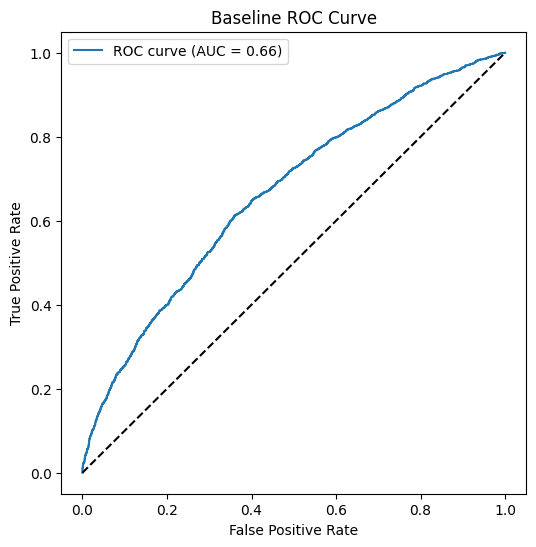

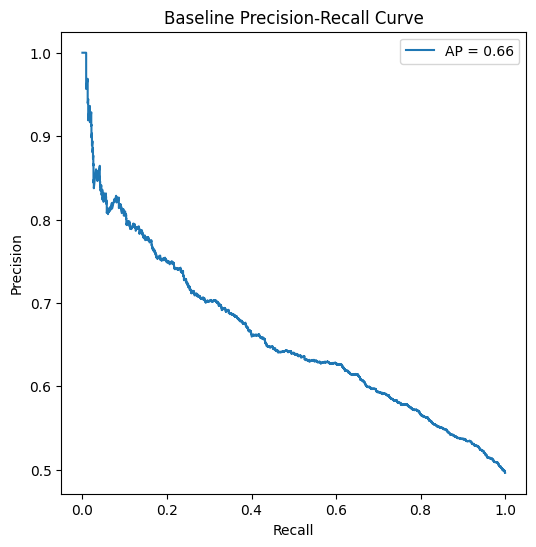

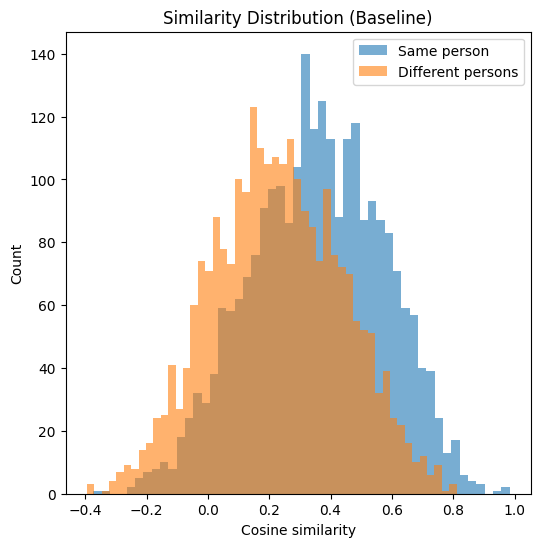

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import random

# -----------------------------
# Step 5.1 – Prepare pairs
# -----------------------------
# y_true = 1 (same person), 0 (different persons)
# y_score = cosine similarity of embeddings

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

y_true = []
y_score = []

# Create a mapping from label to indices
label_to_indices = {}
for i, label in enumerate(eval_labels):
    if label not in label_to_indices:
        label_to_indices[label] = []
    label_to_indices[label].append(i)

persons = list(label_to_indices.keys())

# Take 5000 random pairs for evaluation
num_pairs = 5000
for _ in range(num_pairs):
    # 50% chance same-person, 50% chance different-person
    if random.random() > 0.5 and len(persons) > 0:
        # Same person
        p = random.choice(persons)
        if len(label_to_indices[p]) < 2:
            # If a person has less than 2 images, skip generating a same-person pair
            continue
        idx1, idx2 = random.sample(label_to_indices[p], 2)
        a = eval_embeddings[idx1]
        b = eval_embeddings[idx2]
        y_true.append(1)
        y_score.append(cosine_similarity(a, b))
    elif len(persons) >= 2:
        # Different persons
        p1, p2 = random.sample(persons, 2)
        idx1 = random.choice(label_to_indices[p1])
        idx2 = random.choice(label_to_indices[p2])
        a = eval_embeddings[idx1]
        b = eval_embeddings[idx2]
        y_true.append(0)
        y_score.append(cosine_similarity(a, b))
    else:
        # Not enough persons or images to form a pair, break
        break


y_true = np.array(y_true)
y_score = np.array(y_score)

print("✅ Collected pairs:", len(y_true))

# -----------------------------
# Step 5.2 – ROC Curve
# -----------------------------
if len(y_true) > 0:
  fpr, tpr, _ = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Baseline ROC Curve")
  plt.legend()
  plt.show()
else:
  print("Not enough data to plot ROC curve.")

# -----------------------------
# Step 5.3 – Precision-Recall
# -----------------------------
if len(y_true) > 0:
  precision, recall, _ = precision_recall_curve(y_true, y_score)
  ap = average_precision_score(y_true, y_score)

  plt.figure(figsize=(6,6))
  plt.plot(recall, precision, label=f"AP = {ap:.2f}")
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Baseline Precision-Recall Curve")
  plt.legend()
  plt.show()
else:
  print("Not enough data to plot Precision-Recall curve.")


# -----------------------------
# Step 5.4 – Similarity Distribution
# -----------------------------
if len(y_true) > 0:
  plt.figure(figsize=(6,6))
  plt.hist(y_score[y_true==1], bins=50, alpha=0.6, label="Same person")
  plt.hist(y_score[y_true==0], bins=50, alpha=0.6, label="Different persons")
  plt.xlabel("Cosine similarity")
  plt.ylabel("Count")
  plt.title("Similarity Distribution (Baseline)")
  plt.legend()
  plt.show()
else:
  print("Not enough data to plot Similarity Distribution.")

Fine-tuning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Use the embeddings we already extracted
X_train = torch.tensor(train_embeddings, dtype=torch.float32)
X_eval = torch.tensor(eval_embeddings, dtype=torch.float32)

# Convert string labels to numerical labels
unique_labels = sorted(list(set(train_labels + eval_labels)))
label_to_id = {label: i for i, label in enumerate(unique_labels)}

y_train = torch.tensor([label_to_id[label] for label in train_labels], dtype=torch.long)
y_eval = torch.tensor([label_to_id[label] for label in eval_labels], dtype=torch.long)


# Wrap in DataLoader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
eval_loader = DataLoader(TensorDataset(X_eval, y_eval), batch_size=64)

# Simple classifier head
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

num_classes = len(unique_labels)
model = Classifier(input_dim=512, num_classes=num_classes).to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
for epoch in range(10):  # you can increase to 20–30 for better performance
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# Save checkpoint
torch.save(model.state_dict(), "/content/drive/MyDrive/finetuned_face_classifier.pth")
print("✅ Model saved!")

Epoch 1, Loss: 0.9597
Epoch 2, Loss: 0.0919
Epoch 3, Loss: 0.0277
Epoch 4, Loss: 0.0143
Epoch 5, Loss: 0.0092
Epoch 6, Loss: 0.0065
Epoch 7, Loss: 0.0050
Epoch 8, Loss: 0.0039
Epoch 9, Loss: 0.0031
Epoch 10, Loss: 0.0025
✅ Model saved!


Evaluation

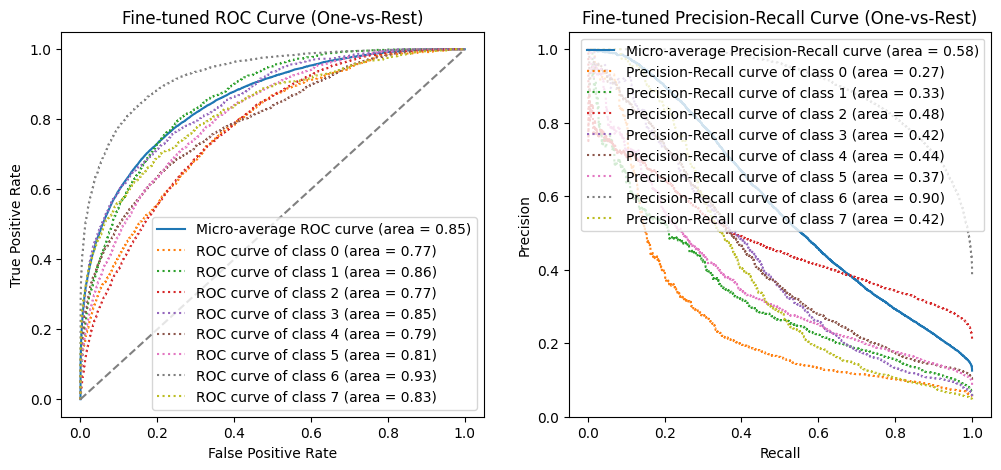

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# Switch to eval mode
model.eval()

# Get predictions for eval set
all_logits, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in eval_loader:
        X_batch = X_batch.cuda()
        logits = model(X_batch)
        all_logits.append(logits.cpu())
        all_labels.append(y_batch)

all_logits = torch.cat(all_logits).numpy()
all_labels = torch.cat(all_labels).numpy()

# Convert logits → probabilities
probs = torch.softmax(torch.tensor(all_logits), dim=1).numpy()

# Binarize the true labels for micro-averaging
y_true_binarized = label_binarize(all_labels, classes=np.arange(num_classes))


# ✅ ROC Curve (One-vs-Rest and Micro-average)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ✅ Precision-Recall Curve (One-vs-Rest and Micro-average)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_binarized[:, i], probs[:, i])
    average_precision[i] = average_precision_score(y_true_binarized[:, i], probs[:, i])

# Compute micro-average Precision-Recall curve and AP
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_binarized.ravel(), probs.ravel())
average_precision["micro"] = average_precision_score(y_true_binarized, probs, average="micro")


# 📊 Plot
plt.figure(figsize=(12,5))

# ROC
plt.subplot(1,2,1)
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average ROC curve (area = {roc_auc['micro']:.2f})")
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], linestyle=':', label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fine-tuned ROC Curve (One-vs-Rest)")
plt.legend()

# PR
plt.subplot(1,2,2)
plt.plot(recall["micro"], precision["micro"], label=f"Micro-average Precision-Recall curve (area = {average_precision['micro']:.2f})")
for i in range(num_classes):
    plt.plot(recall[i], precision[i], linestyle=':', label=f'Precision-Recall curve of class {i} (area = {average_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Fine-tuned Precision-Recall Curve (One-vs-Rest)")
plt.legend()

plt.show()